# 🌊 How to Download GEBCO Bathymetry Data

This guide walks you through the steps to manually download bathymetric data from the [GEBCO (General Bathymetric Chart of the Oceans)](https://www.gebco.net/) website.

---

## 1. Access the GEBCO Website

Visit the GEBCO homepage:  
👉 https://www.gebco.net/

Navigate to:  
**`Data Products` > `Gridded Bathymetry Data`**  
👉 https://www.gebco.net/data-products/gridded-bathymetry-data

![GEBCO homepage](assets/image-1.png)

---

## 2. Open the Custom Download Tool

Click on:  
**"Download data for user-defined areas"**,  
Then go to:  
👉 https://download.gebco.net/


![GEBCO download app](assets/image-2.png)

---


## 3. Define the Region of Interest

You have two methods to define the region:

- 🖱️ **Interactive selection**: Hold `Ctrl`, click and drag on the map to draw a rectangle.
- ⌨️ **Manual input**: Enter the geographic bounds (North, South, East, West) directly in the input fields.

This allows for precise selection of the bathymetric area you need.

![Select region](assets/image-3.png)

> 💡💡 Ensure the box includes your full study area, with a margin if needed. 💡💡

---

## 4. Choose Output Format and Download

GEBCO provides multiple data formats. Recommended options:

- ✅ 2D NetCDF (`.nc`)
- ✅ GeoTIFF (`.tif`)

Then click **"Add to basket"**. Once you confirm it's correct, proceed to **"Download yor data"**

![alt text](assets/image-4.png)          ![alt text](assets/image-5.png)


---


## 📧 Note on Large Files

If your selected area results in a large file, you’ll be asked to enter your email.  
You’ll receive a download link when processing is complete.

> ⏳ Typically takes a few minutes.

![alt text](assets/image-6.png)

---



## ✅ Tip: Load the File in Python





### Once downloaded, you can load the `.tif` file using `xarray`:

In [31]:
import rioxarray as rxr

bathy = (
    rxr.open_rasterio("inputs/example_bathymetry.tif", masked=True)
    .to_dataset(name="elevation")
    .rename({"x": "lon", "y": "lat"})
    .drop_vars(["band", "crs"])
    .isel(band=0)
    .sortby("lat", ascending=False)
)
bathy

<xarray.Dataset> Size: 444kB
Dimensions:    (lon: 389, lat: 282)
Coordinates:
  * lon        (lon) float64 3kB -159.1 -159.1 -159.1 ... -157.5 -157.5 -157.5
  * lat        (lat) float64 2kB 22.16 22.16 22.15 22.15 ... 21.0 20.99 20.99
Data variables:
    elevation  (lat, lon) float32 439kB ...

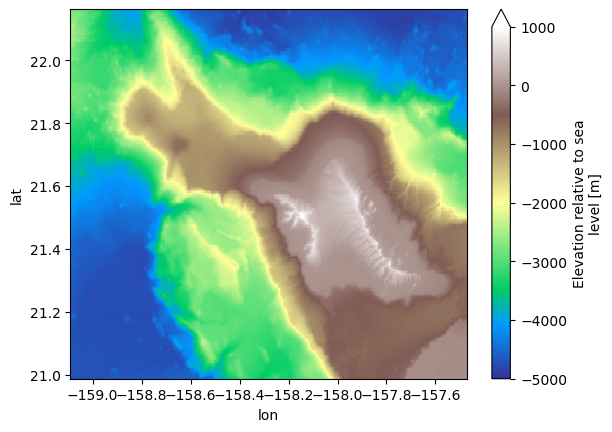

In [26]:
bathy.elevation.plot(vmin=-5000, vmax=1000, cmap="terrain")

### Or you can load the `.nc` file using `xarray`:

In [27]:
import xarray as xr

bathy = xr.open_dataset("inputs/example_bathymetry.nc")
bathy

<xarray.Dataset> Size: 225kB
Dimensions:    (lat: 282, lon: 389)
Coordinates:
  * lat        (lat) float64 2kB 20.99 20.99 21.0 21.0 ... 22.15 22.16 22.16
  * lon        (lon) float64 3kB -159.1 -159.1 -159.1 ... -157.5 -157.5 -157.5
Data variables:
    elevation  (lat, lon) int16 219kB ...
Attributes: (12/36)
    title:                           The GEBCO_2024 Grid - a continuous terra...
    summary:                         The GEBCO_2024 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  1.0
    geospatial_vertical_positive:    up
    identifier_product_doi:          DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    references:                      DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    node_offset:                     1.0

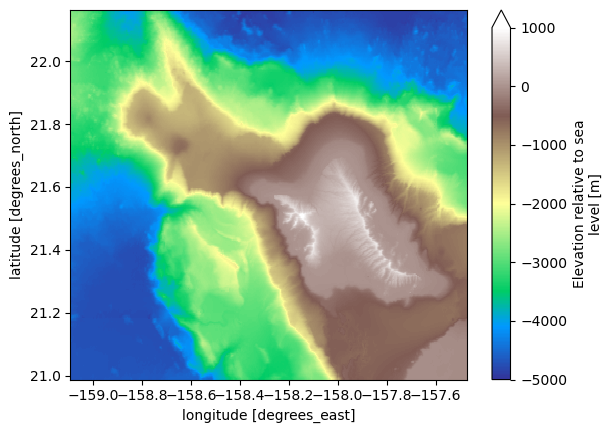

In [28]:
bathy.elevation.plot(vmin=-5000, vmax=1000, cmap="terrain")